# ANOVA  - Lab

## Introduction

In this lab, you'll get some brief practice generating an ANOVA table (AOV) and interpreting its output. You'll then also perform some investigations to compare the method to the t-tests you previously employed to conduct hypothesis testing.

## Objectives

You will be able to:
* Use ANOVA for testing multiple pairwise comparisons
* Understand and explain the methodology behind ANOVA tests

## Loading the Data

Start by loading in the data stored in the file **ToothGrowth.csv**.

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
df = pd.read_csv("ToothGrowth.csv")
df.tail()

,len,supp,dose
55,30.9,OJ,2.0
56,26.4,OJ,2.0
57,27.3,OJ,2.0
58,29.4,OJ,2.0
59,23.0,OJ,2.0


## Generating the ANOVA Table

Now generate an ANOVA table in order to analyze the influence of the medication and dosage 

In [12]:
formula = "len ~ C(supp) + dose"
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

               sum_sq    df           F        PR(>F)
C(supp)    205.350000   1.0   11.446768  1.300662e-03
dose      2224.304298   1.0  123.988774  6.313519e-16
Residual  1022.555036  57.0         NaN           NaN


## Reading the Table

Make a brief comment regarding the statistics regarding the effect of supplement and dosage on tooth length:

The dose has a higher probability of influencing tooth length. The supplement also appears influential, but dosage is more significant.

## Comparing to T-Tests

Now that you've gotten a brief chance to interact with ANOVA, its interesting to compare the results to those from the t-tests you were just working with. With that, start by breaking the data into two samples: those given the OJ supplement, and those given the VC supplement. Afterwards, you'll conduct a t-test to compare the tooth length of these two different samples.

In [15]:
OJ_df = df.loc[df["supp"] == "OJ"]
VC_df = df.loc[df["supp"] == "VC"]

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


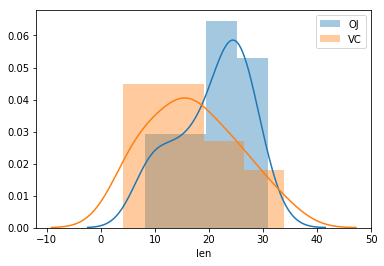

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(OJ_df["len"], label="OJ")
sns.distplot(VC_df["len"], label="VC")
plt.legend()
plt.show()

Now compare a t-test between these two groups and print the associated two-sided p-value.

In [19]:
from scipy import stats

stats.ttest_ind(OJ_df["len"], VC_df["len"])

Ttest_indResult(statistic=1.91526826869527, pvalue=0.06039337122412849)

## A 2-Category ANOVA F-Test is Equivalent to a 2-Tailed t-Test!

Now, recalculate an ANOVA F-test with only the supplement variable. An ANOVA F-test between two categories is the same as performing a 2-tailed t-Test! So, the p-value in the table should be identical to your calculation above.

> Note: there may be a small fractional difference (>0.001) between the two values due to a rounding error between implementations. 

In [20]:
#Your code here; conduct an ANOVA F-test of the oj and vc supplement groups.

formula2 = "len ~ C(supp)"
lm2 = ols(formula2, df).fit()
table2 = sm.stats.anova_lm(lm2, typ=2)
print(table2)

#Compare the p-value to that of the t-test above. 
#They should match (there may be a tiny fractional difference due to rounding errors in varying implementations)

               sum_sq    df         F    PR(>F)
C(supp)    205.350000   1.0  3.668253  0.060393
Residual  3246.859333  58.0       NaN       NaN


- *T-Test Result:* pvalue=0.06039337122412849
- *ANOVA Result:* pvalue = 0.060393

## Generating Multiple T-Tests

While the 2-category ANOVA test is identical to a 2-tailed t-Test, performing multiple t-tests leads to the multiple comparisons problem. To investigate this, look at the various sample groups you could create from the 2 features: 

In [21]:
for group in df.groupby(['supp', 'dose'])['len']:
    group_name = group[0]
    data = group[1]
    print(group_name)

('OJ', 0.5)
('OJ', 1.0)
('OJ', 2.0)
('VC', 0.5)
('VC', 1.0)
('VC', 2.0)


While bad practice, examine the effects of calculating multiple t-tests with the various combinations of these. To do this, generate all combinations of the above groups. For each pairwise combination, calculate the p-value of a 2 sided t-test. Print the group combinations and their associated p-value for the two-sided t-test.

In [ ]:
#Your code here; reuse your $t$-test code above to calculate the p-value for a 2-sided $t$-test
#for all combinations of the supplement-dose groups listed above. 
#(Since there isn't a control group, compare each group to every other group.)

## Summary

In this lesson, you examined the ANOVA technique to generalize A/B testing methods to multiple groups and factors.